# Creating a K-means clusterig model to find the fault classes in a PV installation

Importing Modules

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [79]:
df_new=pd.read_excel('time.xlsx')

for loop to take only the average of the avlues between the  zero values(nigths) and append to a list

In [80]:
total=0
g_avg=[]
output=[]
counter=0
for x in df_new[df_new['T']>8]['G']:
    if (x<16):
        counter+=1
        total+=x
    if(x>16 and counter!=0):
        z=total/counter
        g_avg.append(z)
        counter=0
        total=0
print(g_avg)

[0.4483353357232698, 0.5204140761755487, 0.2590187684713375, 0.7032743365030676, 0.822867346043166, 0.2655193902302631, 1.2099770722222225, 0.4536909761801239, 0.2967947560126583, 0.43690678081761, 0.4025675678233438, 0.5265060099071206, 0.4580686947040496, 0.6765969259259259, 0.6148298468277943, 0.4913150735562304, 0.468506022530864, 0.6901209980434779, 0.3945690816081504, 0.29915744775641023, 0.5405380183333331, 0.7787173098159509, 0.4337191224025974, 0.3644046970588235, 0.40735985765472305, 0.3789997074675325, 0.4714501061093245, 0.8160812817679555, 10.299753333333333, 0.7305523831746035, 0.4499315535031848, 0.2088677152027027, 0.4249714499999998, 0.34042816411960136, 0.3380527684385382, 0.8072534031413611, 0.3502856326259946, 0.44019944122562665, 0.4105238271708682, 0.44104167315492937, 0.46949263578378386, 0.3902880164971747, 0.6728597223478262, 0.43730087078651686, 0.2263176855555555, 0.4114143428160918, 0.3949417322857141, 0.39717222134831454, 14.974699999999999, 0.4219441102777

In [81]:
total=0
p_avg=[]
output=[]
counter=0
for x in df_new[df_new['T']>8]['P']:
    if (x<16):
        counter+=1
        total+=x
    if(x>16 and counter!=0):
        z=total/counter
        p_avg.append(z)
        counter=0
        total=0
print(p_avg)

[0.7652772736507937, 0.39845860841423947, 0.1601703569579288, 0.4036320787096774, 1.3017648375, 0.17512057133779266, 13.221633333333335, 0.6687252505555555, 0.2565899357827476, 0.22957448553054668, 0.2597327612903225, 0.2935628129032258, 0.3876965111464968, 0.3416599392971245, 0.5020576851648353, 0.5126536981366461, 0.3450093775700935, 0.43388472955974855, 0.9674374390566035, 0.2889678717923323, 0.24698671850649356, 0.6025462553672316, 0.7288957295597487, 0.2816170993377484, 0.31375003344370866, 0.311127738410596, 0.26854701353135324, 0.4102681637254903, 0.7269293761363639, 11.60564, 0.6131392935275082, 0.36853753322580646, 0.15059829693877555, 0.3832791627062706, 0.27293323489932886, 0.27048962080536915, 0.868998772486772, 0.3889870559681696, 0.43436481061452503, 0.4034308039325841, 0.43626556700564983, 0.47239352652303507, 0.38065626886685544, 0.6007392625000004, 0.4207855977591037, 0.24287449471590905, 0.35956441120689653, 0.39374445669515673, 0.42964019972067047, 0.7044775737127369

to add the new columns to the dataframe, we need to convert the lists to a pandas series so that the empty rows will be 
filled as 'NAN'

In [82]:
df_new['g_avg'] = pd.Series(g_avg)
df_new['p_avg'] = pd.Series(p_avg)

Drop the original G and P

In [83]:
df_new=df.drop(columns=['G','P','TIME','T'])

In [84]:
df_new

,g_avg,p_avg
0,0.204120,0.177977
1,1.771161,2.994410
2,0.153537,4.534480
3,0.083723,2.425370
4,0.087648,0.168391
...,...,...
97195,NaN,NaN
97196,NaN,NaN
97197,NaN,NaN
97198,NaN,NaN


Deleteing teh Nan rows

In [85]:
df_new.dropna()

,g_avg,p_avg
0,0.204120,0.177977
1,1.771161,2.994410
2,0.153537,4.534480
3,0.083723,2.425370
4,0.087648,0.168391
...,...,...
71,0.076401,0.147712
72,0.091561,0.126949
73,0.079992,0.178369
74,0.100372,0.153506


In [86]:
df_new = df_new.reset_index()

In [87]:
df_new=df_new.dropna()
df_new

,index,g_avg,p_avg
0,0,0.204120,0.177977
1,1,1.771161,2.994410
2,2,0.153537,4.534480
3,3,0.083723,2.425370
4,4,0.087648,0.168391
...,...,...,...
71,71,0.076401,0.147712
72,72,0.091561,0.126949
73,73,0.079992,0.178369
74,74,0.100372,0.153506


Carrying out the K-means model testing

In [88]:
km=KMeans(n_clusters=10)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [89]:
y_pred=km.fit_predict(df_new)
y_pred

array([8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9,
       9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [90]:
df_new['cluster']=y_pred
df_new.head()

,index,g_avg,p_avg,cluster
0,0,0.204120,0.177977,8
1,1,1.771161,2.994410,8
2,2,0.153537,4.534480,8
3,3,0.083723,2.425370,8
4,4,0.087648,0.168391,8


In [91]:
km.cluster_centers_

array([[ 9.        ,  1.00860427,  3.61482812],
       [53.        ,  0.12555387,  0.11140895],
       [29.        ,  0.12491287,  0.94121942],
       [71.        ,  0.59897717,  0.15606678],
       [44.5       ,  0.12311852,  0.63526749],
       [15.        ,  0.12486746,  0.12928814],
       [62.        ,  0.58243254,  0.65540946],
       [36.5       ,  0.13286009,  0.11759021],
       [ 3.        ,  0.4127651 ,  1.48902411],
       [22.        ,  0.56165931,  0.1820307 ]])

Text(0, 0.5, 'P')

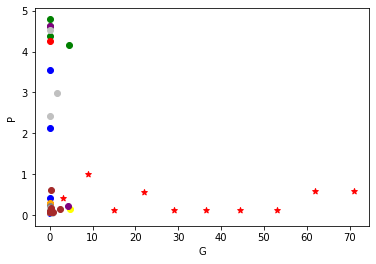

In [97]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]
df3=df_new[df_new.cluster==3]
df4=df_new[df_new.cluster==4]
df5=df_new[df_new.cluster==5]
df6=df_new[df_new.cluster==6]
df7=df_new[df_new.cluster==7]
df8=df_new[df_new.cluster==8]
df9=df_new[df_new.cluster==9]

plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='b')
plt.scatter(df2.g_avg,df2.p_avg, color='blue')
plt.scatter(df3.g_avg,df3.p_avg, color='yellow')
plt.scatter(df4.g_avg,df4.p_avg, color='red')
plt.scatter(df5.g_avg,df5.p_avg, color='orange')
plt.scatter(df6.g_avg,df6.p_avg, color='purple')
plt.scatter(df7.g_avg,df7.p_avg, color='grey')
plt.scatter(df8.g_avg,df8.p_avg, color='silver')
plt.scatter(df9.g_avg,df9.p_avg, color='brown')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

data nomalisation

In [98]:
scaler= MinMaxScaler()
scaler.fit(df_new[['g_avg']])
df_new[['g_avg']]=scaler.transform(df_new[['g_avg']])
scaler.fit(df_new[['p_avg']])
df_new[['p_avg']]=scaler.transform(df_new[['p_avg']])
df_new.head()

,index,g_avg,p_avg,cluster
0,0,0.031006,0.026438,8
1,1,0.372474,0.619634,8
2,2,0.019984,0.944003,8
3,3,0.004771,0.499783,8
4,4,0.005626,0.024418,8


In [99]:
y_pred=km.fit_predict(df_new)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1,
       1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7,
       7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [100]:
df_new['cluster']=y_pred
df_new.head()

,index,g_avg,p_avg,cluster
0,0,0.031006,0.026438,2
1,1,0.372474,0.619634,2
2,2,0.019984,0.944003,2
3,3,0.004771,0.499783,2
4,4,0.005626,0.024418,2


Text(0, 0.5, 'P')

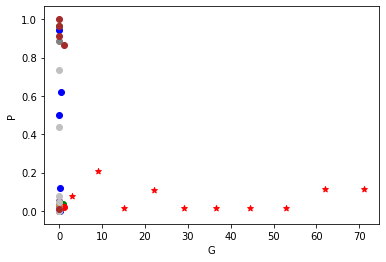

In [101]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]
df3=df_new[df_new.cluster==3]
df4=df_new[df_new.cluster==4]
df5=df_new[df_new.cluster==5]
df6=df_new[df_new.cluster==6]
df7=df_new[df_new.cluster==7]
df8=df_new[df_new.cluster==8]
df9=df_new[df_new.cluster==9]

plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='b')
plt.scatter(df2.g_avg,df2.p_avg, color='blue')
plt.scatter(df3.g_avg,df3.p_avg, color='yellow')
plt.scatter(df4.g_avg,df4.p_avg, color='red')
plt.scatter(df5.g_avg,df5.p_avg, color='orange')
plt.scatter(df6.g_avg,df6.p_avg, color='purple')
plt.scatter(df7.g_avg,df7.p_avg, color='grey')
plt.scatter(df8.g_avg,df8.p_avg, color='silver')
plt.scatter(df9.g_avg,df9.p_avg, color='brown')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

Implementing a the elbow technique to find the optimal K value

In [102]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_new[['g_avg','p_avg']])
    sse.append(km.inertia_)
sse

[9.162755850218838,
 3.3233574334691625,
 1.253676927516592,
 0.7133072221383387,
 0.3551501516023259,
 0.20368602057140262,
 0.10008162537466786,
 0.06272409171643276,
 0.0423807145465034,
 0.02887275020841827]

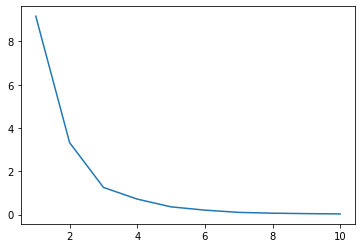

In [103]:
plt.plot(k_range,sse)

In [104]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df_new[['g_avg','p_avg']])

In [105]:
df_new['cluster']=y_pred

Text(0, 0.5, 'P')

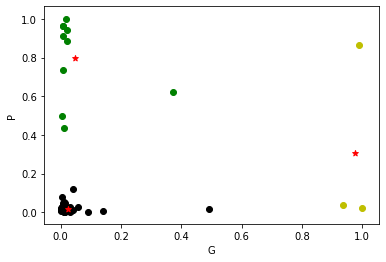

In [106]:
df0=df_new[df_new.cluster==0]
df1=df_new[df_new.cluster==1]
df2=df_new[df_new.cluster==2]


plt.scatter(df0.g_avg,df0.p_avg, color='g')
plt.scatter(df1.g_avg,df1.p_avg, color='black')
plt.scatter(df2.g_avg,df2.p_avg, color='y')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='r', marker='*')

plt.xlabel('G')
plt.ylabel('P')

In [107]:
df_new['g_avg'].describe()

count    76.000000
mean      0.065154
std       0.198804
min       0.000000
25%       0.007463
50%       0.011565
75%       0.019892
max       1.000000
Name: g_avg, dtype: float64